<a href="https://colab.research.google.com/github/ertecino/Algoritma-Binary-Search-Tree/blob/main/gayrimenkul_kira_tahmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("drmurataltun/antalya-muratpaa-daire-kira-cretleri-2024-ocak")

print("Path to dataset files:", path)

100%|██████████| 13.9k/13.9k [00:00<00:00, 11.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/drmurataltun/antalya-muratpaa-daire-kira-cretleri-2024-ocak/versions/1


In [3]:
import os

# path değişkeni zaten tanımlı, içindeki dosyalara bakalım
os.listdir(path)

['antalya_kiralik_ev.csv']

In [4]:
import pandas as pd

df = pd.read_csv(os.path.join(path, "antalya_kiralik_ev.csv"))
df.head()

,Unnamed: 0,mahalle,fiyat,brut_alan_m2,net_alan_m2,oda_sayisi,bina_yas,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,otopark,esya_durumu,site_icinde,aidat,depozito,sahibi
0,1,Bayındır Mh.,15000.0,90.0,80.0,2+1,21-25 arası,Giriş Katı,4.0,Klima,1.0,0,0,Açık Otopark,1,0,100,15000,0
1,2,Çaybaşı Mh.,29000.0,145.0,135.0,3+1,0,1,5.0,Kombi (Doğalgaz),1.0,1,1,Kapalı Otopark,0,1,1500,30000,0
2,3,Güzeloba Mh.,24750.0,145.0,130.0,3+1,11-15 arası,3,4.0,Klima,1.0,1,0,Açık Otopark,0,0,500,25000,1
3,4,Şirinyalı Mh.,30000.0,230.0,200.0,3+1,5-10 arası,2,3.0,Doğalgaz Sobası,2.0,0,0,Açık Otopark,1,0,0,30000,0
4,5,Çağlayan Mh.,37500.0,320.0,300.0,4+2,16-20 arası,8,8.0,Klima,3.0,1,1,Açık Otopark,0,1,0,37500,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              750 non-null    int64  
 1   mahalle                 750 non-null    object 
 2   fiyat                   750 non-null    float64
 3   brut_alan_m2            750 non-null    float64
 4   net_alan_m2             750 non-null    float64
 5   oda_sayisi              750 non-null    object 
 6   bina_yas                750 non-null    object 
 7   dairenin_bulundugu_kat  750 non-null    object 
 8   bina_kat_sayisi         750 non-null    float64
 9   isitma_turu             750 non-null    object 
 10  banyo_sayisi            750 non-null    float64
 11  balkon                  750 non-null    int64  
 12  asansor                 750 non-null    int64  
 13  otopark                 750 non-null    object 
 14  esya_durumu             750 non-null    in

In [6]:
df.describe()

,Unnamed: 0,fiyat,brut_alan_m2,net_alan_m2,bina_kat_sayisi,banyo_sayisi,balkon,asansor,esya_durumu,site_icinde,aidat,depozito,sahibi
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,411.692000,24260.117333,123.754667,111.505333,5.204000,1.28000,0.917333,0.626667,0.482667,0.281333,419.381333,21955.133333,0.088000
std,238.319713,16680.292541,53.263920,48.517233,2.959853,0.52086,0.275561,0.484012,0.500033,0.449950,2644.590077,24414.825180,0.283484
min,1.000000,10250.000000,25.000000,20.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,208.250000,15000.000000,85.000000,75.000000,3.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000
50%,414.500000,20000.000000,115.000000,100.000000,4.000000,1.00000,1.000000,1.000000,0.000000,0.000000,50.000000,18000.000000,0.000000
75%,617.750000,27000.000000,150.000000,140.000000,7.000000,1.00000,1.000000,1.000000,1.000000,1.000000,300.000000,27375.000000,0.000000
max,828.000000,200000.000000,400.000000,370.000000,17.000000,4.00000,1.000000,1.000000,1.000000,1.000000,70000.000000,200000.000000,1.000000


In [7]:
df.isnull().sum()

,0
Unnamed: 0,0
mahalle,0
fiyat,0
brut_alan_m2,0
net_alan_m2,0
oda_sayisi,0
bina_yas,0
dairenin_bulundugu_kat,0
bina_kat_sayisi,0
isitma_turu,0


In [8]:
# Unnamed: 0 index’leme amacıyla eklenmiş, kaldırabiliriz.
df.drop("Unnamed: 0", axis=1, inplace=True)

In [9]:
# oda_sayisi (object → int)
# Amaç: “2+1” → 3 gibi toplam oda sayısına dönüştürmek.
def toplam_oda_sayisi(oda_str):
    try:
        parcalar = oda_str.split('+')
        return int(parcalar[0]) + int(parcalar[1])
    except:
        return None

df["toplam_oda"] = df["oda_sayisi"].apply(toplam_oda_sayisi)

In [33]:
# bina_yas (object → int)
# Amaç: “Sıfır bina” → 0, diğerleri ortalama yaşa dönüşsün
def bina_yas_donusum(yas):
    if isinstance(yas, str):
        yas = yas.lower().strip()
        if "sıfır" in yas:
            return 0
        elif "ve üzeri" in yas:
            return 35  # Tahmini üst yaş
        elif "arası" in yas:
            try:
                parts = yas.split(" ")[0].split("-")
                alt = int(parts[0])
                ust = int(parts[1])
                return (alt + ust) // 2
            except:
                return None
        else:
            try:
                return int(yas)
            except:
                return None
    return None

df["bina_yasi"] = df["bina_yas"].apply(bina_yas_donusum)


In [17]:
# ilk beş satıra bakalım
df.head()

,mahalle,fiyat,brut_alan_m2,net_alan_m2,oda_sayisi,bina_yas,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,otopark,esya_durumu,site_icinde,aidat,depozito,sahibi,toplam_oda,bina_yasi
0,Bayındır Mh.,15000.0,90.0,80.0,2+1,21-25 arası,Giriş Katı,4.0,Klima,1.0,0,0,Açık Otopark,1,0,100,15000,0,3.0,23
1,Çaybaşı Mh.,29000.0,145.0,135.0,3+1,0,1,5.0,Kombi (Doğalgaz),1.0,1,1,Kapalı Otopark,0,1,1500,30000,0,4.0,0
2,Güzeloba Mh.,24750.0,145.0,130.0,3+1,11-15 arası,3,4.0,Klima,1.0,1,0,Açık Otopark,0,0,500,25000,1,4.0,13
3,Şirinyalı Mh.,30000.0,230.0,200.0,3+1,5-10 arası,2,3.0,Doğalgaz Sobası,2.0,0,0,Açık Otopark,1,0,0,30000,0,4.0,7
4,Çağlayan Mh.,37500.0,320.0,300.0,4+2,16-20 arası,8,8.0,Klima,3.0,1,1,Açık Otopark,0,1,0,37500,0,6.0,18


In [19]:
# bina_yasi sütunda boş veri var mı?
df["bina_yasi"].isnull().sum()

np.int64(0)

In [20]:
# Mahalle Bazında Ortalama Kira
mahalle_kira = df.groupby("mahalle")["fiyat"].mean().sort_values(ascending=False)

# İlk 10 mahalleyi görelim
print(mahalle_kira.head(10))

mahalle
Yeşilbahçe Mh.      37326.086957
Çağlayan Mh.        37024.615385
Şirinyalı Mh.       34634.146341
Fener Mah.          33488.095238
Gençlik Mh.         33382.352941
Güzeloluk Mh.       32050.000000
Bahçelievler Mh.    31808.333333
Haşimişcan Mh.      29035.714286
Meltem Mah.         27312.500000
Ermenek Mah.        26762.500000
Name: fiyat, dtype: float64


<ipython-input-21-f1c514804693>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mahalle_kira.head(10).values,


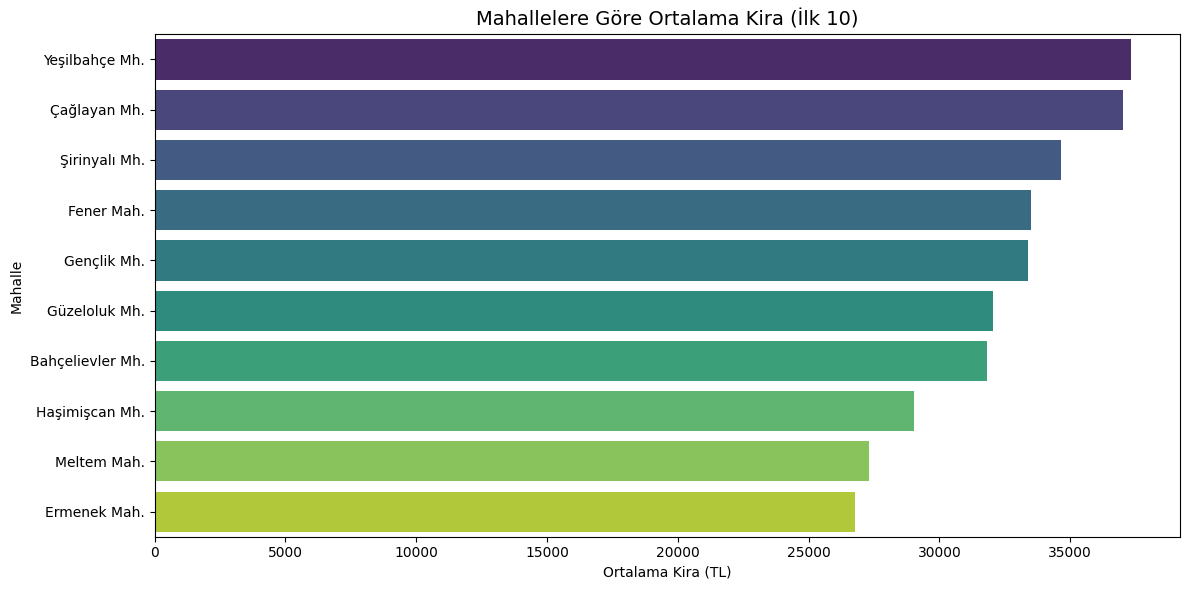

In [21]:
# Görselleştirme (Bar Grafiği)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=mahalle_kira.head(10).values,
            y=mahalle_kira.head(10).index,
            palette="viridis")

plt.title("Mahallelere Göre Ortalama Kira (İlk 10)", fontsize=14)
plt.xlabel("Ortalama Kira (TL)")
plt.ylabel("Mahalle")
plt.tight_layout()
plt.show()

In [22]:
# Ortalama Alan Başına Kira (TL/m²)
# Dairenin büyüklüğüne göre kira fiyatı adil mi?
# Hangi mahallede m² başına kira daha yüksek?

# Net alan üzerinden m² fiyatı hesapla
df["fiyat_m2"] = df["fiyat"] / df["net_alan_m2"]

# Mahalle bazında ortalama m² fiyatı
mahalle_m2_fiyat = df.groupby("mahalle")["fiyat_m2"].mean().sort_values(ascending=False)

# İlk 10 mahalle
mahalle_m2_fiyat.head(10)

,fiyat_m2
mahalle,
Selçuk Mh.,375.000000
Yeşilova Mh.,345.454545
Topçular Mh.,340.000000
Haşimişcan Mh.,320.600416
Elmalı Mh.,300.264706
Güzeloba Mh.,297.084272
Çağlayan Mh.,293.114236
Fener Mah.,287.598119
Ermenek Mah.,285.761065


<ipython-input-23-6a9d4800461f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mahalle_m2_fiyat.head(10).values,


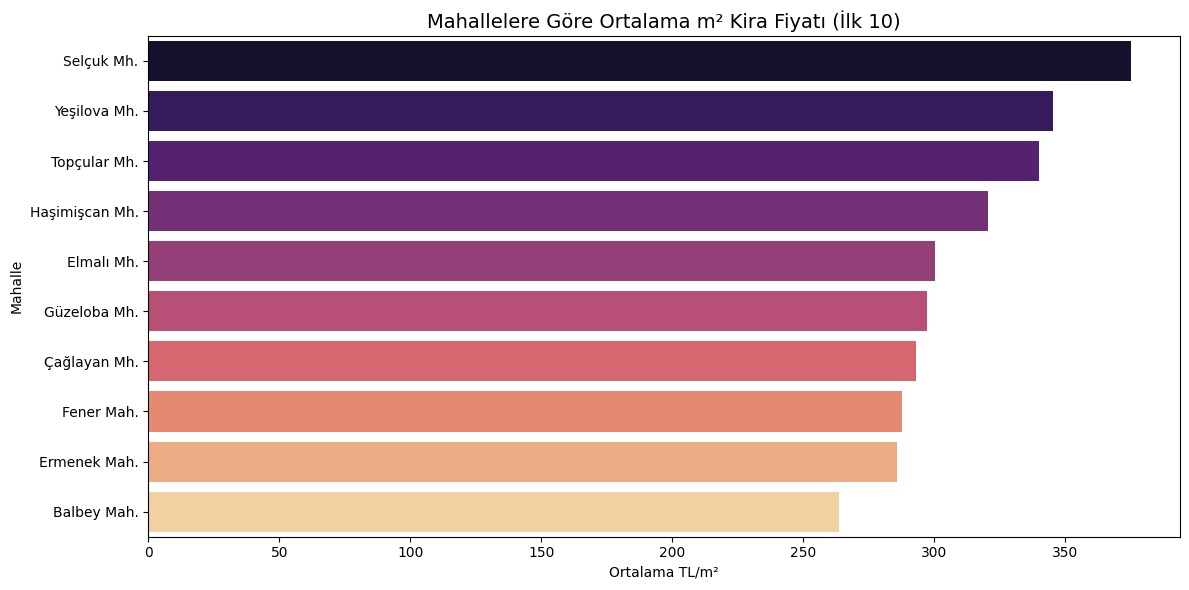

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(x=mahalle_m2_fiyat.head(10).values,
            y=mahalle_m2_fiyat.head(10).index,
            palette="magma")

plt.title("Mahallelere Göre Ortalama m² Kira Fiyatı (İlk 10)", fontsize=14)
plt.xlabel("Ortalama TL/m²")
plt.ylabel("Mahalle")
plt.tight_layout()
plt.show()

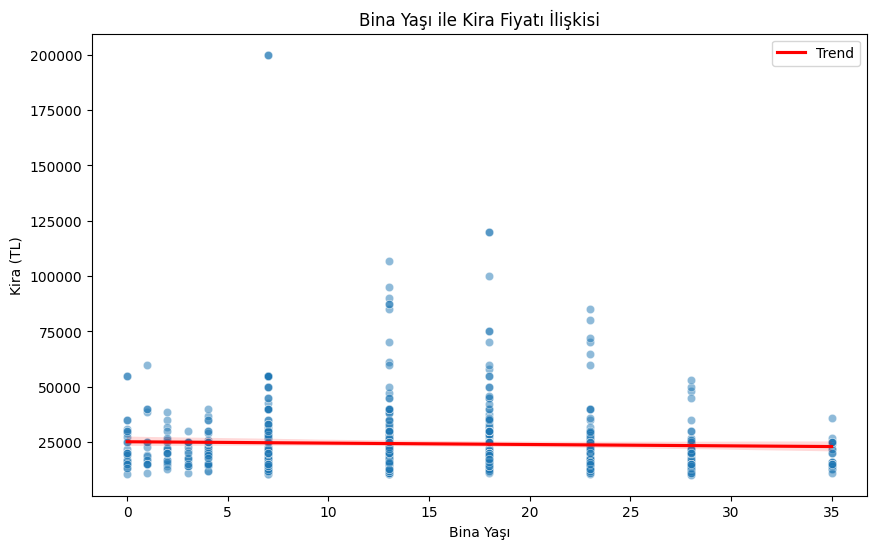

In [24]:
# Yeni binalar gerçekten daha pahalı mı?

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="bina_yasi", y="fiyat", alpha=0.5)
sns.regplot(data=df, x="bina_yasi", y="fiyat", scatter=False, color="red", label="Trend")

plt.title("Bina Yaşı ile Kira Fiyatı İlişkisi")
plt.xlabel("Bina Yaşı")
plt.ylabel("Kira (TL)")
plt.legend()
plt.show()

<ipython-input-26-6e788450fb44>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="toplam_oda", y="fiyat", palette="coolwarm")


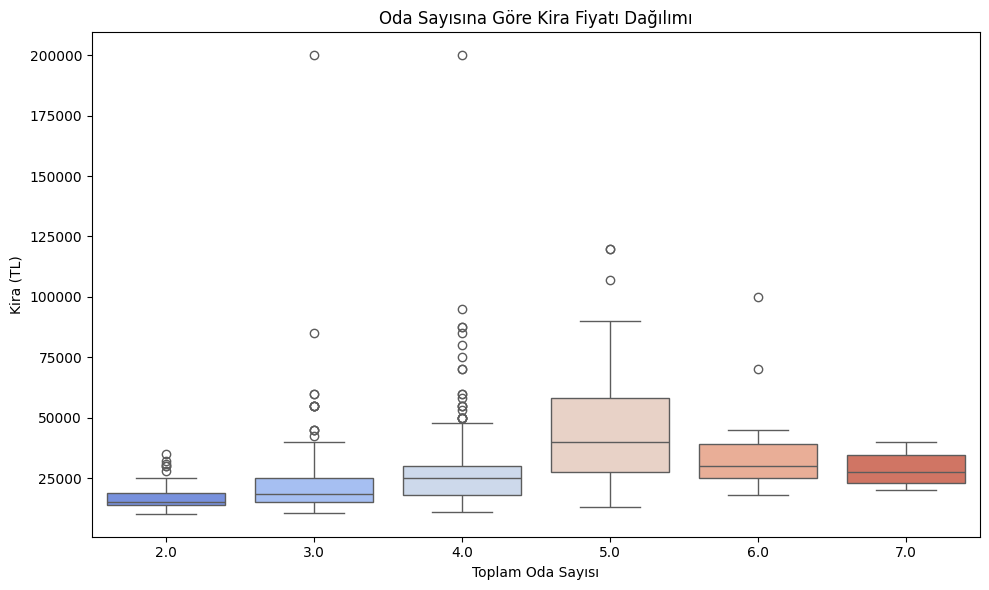

In [26]:
# Oda Sayısı ile Kira Fiyatı
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="toplam_oda", y="fiyat", palette="coolwarm")

plt.title("Oda Sayısına Göre Kira Fiyatı Dağılımı")
plt.xlabel("Toplam Oda Sayısı")
plt.ylabel("Kira (TL)")
plt.tight_layout()
plt.show()

<ipython-input-27-87ebb4d2e1f8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="site_icinde", y="fiyat", palette="Set2")


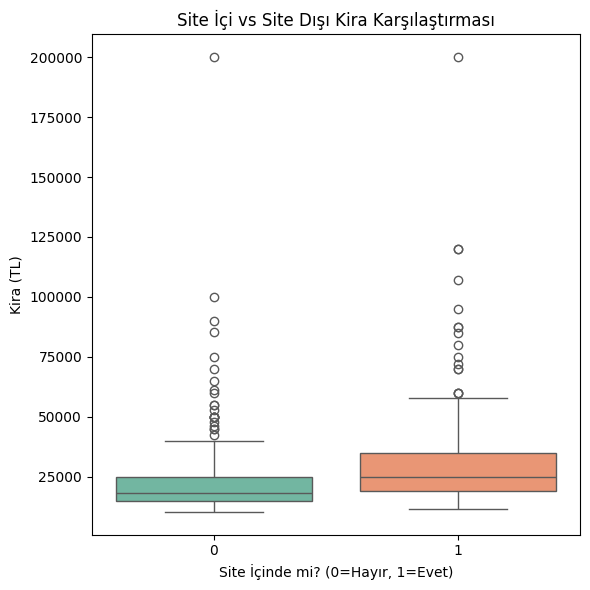

In [27]:
# Site İçinde Olmanın Kira Fiyatına Etkisi
plt.figure(figsize=(6,6))
sns.boxplot(data=df, x="site_icinde", y="fiyat", palette="Set2")

plt.title("Site İçi vs Site Dışı Kira Karşılaştırması")
plt.xlabel("Site İçinde mi? (0=Hayır, 1=Evet)")
plt.ylabel("Kira (TL)")
plt.tight_layout()
plt.show()

In [28]:
# Aykırı Değerlerin Temizlenmesi (fiyat için)
Q1 = df["fiyat"].quantile(0.25)
Q3 = df["fiyat"].quantile(0.75)
IQR = Q3 - Q1

alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

df = df[(df["fiyat"] >= alt_sinir) & (df["fiyat"] <= ust_sinir)]

In [29]:
# Encoding ve Özellik Seçimi
# Aşağıdaki kategorik değişkenleri one-hot encoding'e çevirelim
# mahalle, oda_sayisi, dairenin_bulundugu_kat, isitma_turu, otopark
df_encoded = pd.get_dummies(df, columns=["mahalle", "oda_sayisi", "dairenin_bulundugu_kat", "isitma_turu", "otopark"], drop_first=True)

In [30]:
# Ve hedef değişken ile özellikleri ayıralım
X = df_encoded.drop(columns=["fiyat"])
y = df_encoded["fiyat"]

In [35]:
# Model Denemeleri


# Kategorik sütunlar
kategorik_sutunlar = ["mahalle", "dairenin_bulundugu_kat", "isitma_turu", "otopark"]

# One-hot encoding uyguluyoruz
df_encoded = pd.get_dummies(df, columns=kategorik_sutunlar, drop_first=True)

# Hedef ve özellikler
X = df_encoded.drop(columns=["fiyat", "oda_sayisi", "bina_yas"])  # oda_sayisi ve bina_yas sütunlarını çıkarıyoruz, zaten 'toplam_oda' ve 'bina_yasi' var
y = df_encoded["fiyat"]

# Train/validation/test set olarak bölme
from sklearn.model_selection import train_test_split

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)

# Model oluşturma ve eğitme
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Validasyon tahmini ve hata hesaplama
y_val_pred = rf_model.predict(X_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
print("Validation RMSE (Random Forest):", rmse_val)


Validation RMSE (Random Forest): 2771.5263431900585


In [36]:
# Kira fiyatlarının istatistiklerine bakalım
print("Kira Fiyatı Ortalama:", df["fiyat"].mean())
print("Kira Fiyatı Medyan:", df["fiyat"].median())
print("Kira Fiyatı Min:", df["fiyat"].min())
print("Kira Fiyatı Max:", df["fiyat"].max())

Kira Fiyatı Ortalama: 20986.94871794872
Kira Fiyatı Medyan: 20000.0
Kira Fiyatı Min: 10250.0
Kira Fiyatı Max: 45000.0


In [38]:
# Eksik değerleri bulalım
X_train.isnull().sum().sort_values(ascending=False).head()

,0
toplam_oda,4
net_alan_m2,0
brut_alan_m2,0
bina_kat_sayisi,0
banyo_sayisi,0


In [41]:
# toplam_oda sütunundaki eksik değerleri doldur
X_train["toplam_oda"] = X_train["toplam_oda"].fillna(X_train["toplam_oda"].median())
X_val["toplam_oda"] = X_val["toplam_oda"].fillna(X_val["toplam_oda"].median())

In [42]:
# Eksik değerleri kontrol et
print("Eksik değerler - X_train")
print(X_train.isnull().sum().sort_values(ascending=False))
print("\nEksik değerler - X_val")
print(X_val.isnull().sum().sort_values(ascending=False))

# -------------------------
# Sayısal sütunları median ile doldur
num_cols = ["toplam_oda", "bina_yasi", "bina_kat_sayisi", "brut_alan_m2", "net_alan_m2", "banyo_sayisi"]

for col in num_cols:
    X_train[col] = X_train[col].fillna(X_train[col].median())
    X_val[col] = X_val[col].fillna(X_val[col].median())

# Kategorik (object tipi) sütunları belirle
cat_cols = X_train.select_dtypes(include="object").columns.tolist()

# Eksik kategorik değerleri "Bilinmiyor" ile doldur
for col in cat_cols:
    X_train[col] = X_train[col].fillna("Bilinmiyor")
    X_val[col] = X_val[col].fillna("Bilinmiyor")

# -------------------------
# One-hot encoding (kategorik veriyi sayısallaştır)
X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val)

# Eğitim ve doğrulama setlerinin aynı sütunlara sahip olmasını sağla
X_train, X_val = X_train.align(X_val, join="left", axis=1, fill_value=0)

# -------------------------
# Kontrol: Artık NaN kaldı mı?
print("Son kontrol - NaN var mı?")
print(X_train.isnull().sum().sum(), X_val.isnull().sum().sum())


Eksik değerler - X_train
brut_alan_m2              0
net_alan_m2               0
bina_kat_sayisi           0
banyo_sayisi              0
balkon                    0
                         ..
isitma_turu_Yok           0
isitma_turu_Şömine        0
otopark_Açık Otopark      0
otopark_Kapalı Otopark    0
otopark_Yok               0
Length: 99, dtype: int64

Eksik değerler - X_val
brut_alan_m2              0
net_alan_m2               0
bina_kat_sayisi           0
banyo_sayisi              0
balkon                    0
                         ..
isitma_turu_Yok           0
isitma_turu_Şömine        0
otopark_Açık Otopark      0
otopark_Kapalı Otopark    0
otopark_Yok               0
Length: 99, dtype: int64
Son kontrol - NaN var mı?
0 0


In [43]:
# farklı modelleri deneyip performanslarına bakalım
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    print(f"{name} Validation RMSE: {rmse:.2f}")

Linear Regression Validation RMSE: 3300.52
Random Forest Validation RMSE: 2861.63
Gradient Boosting Validation RMSE: 2173.07


<ipython-input-44-7b807ba3be57>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')


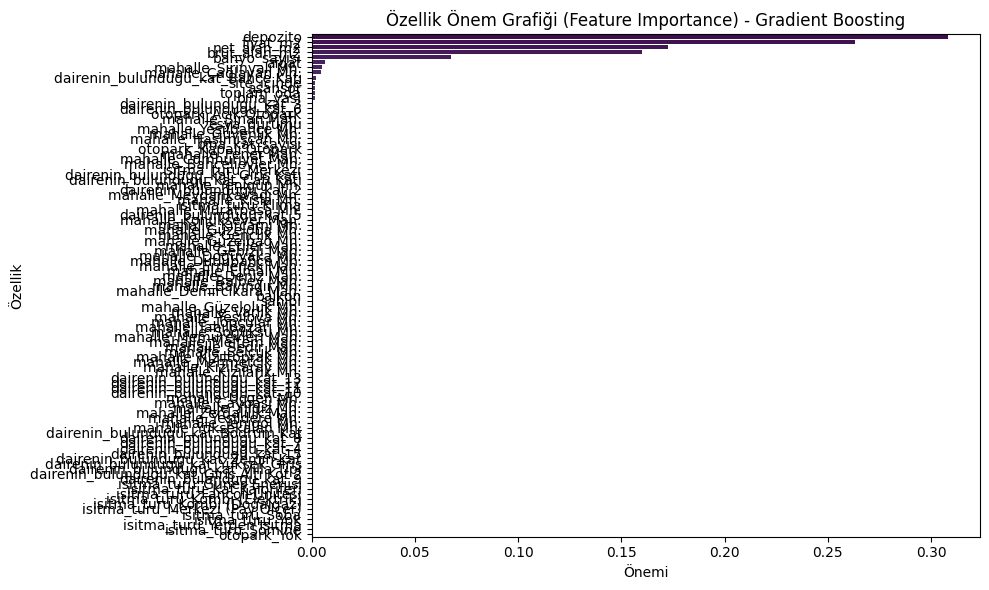

In [44]:
# Gradient Boosting modelinizle eğitildikten sonra, feature_importances_ özelliği sayesinde
# hangi değişkenlerin kira fiyatını ne derece etkilediğini kolayca görelim
import matplotlib.pyplot as plt
import seaborn as sns

# Özellik önemini al
importances = models["Gradient Boosting"].feature_importances_
feature_names = X_train.columns

# Bir DataFrame olarak düzenle
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Görselleştir
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')
plt.title('Özellik Önem Grafiği (Feature Importance) - Gradient Boosting')
plt.xlabel('Önemi')
plt.ylabel('Özellik')
plt.tight_layout()
plt.show()

<ipython-input-45-ffd9df058dd8>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')


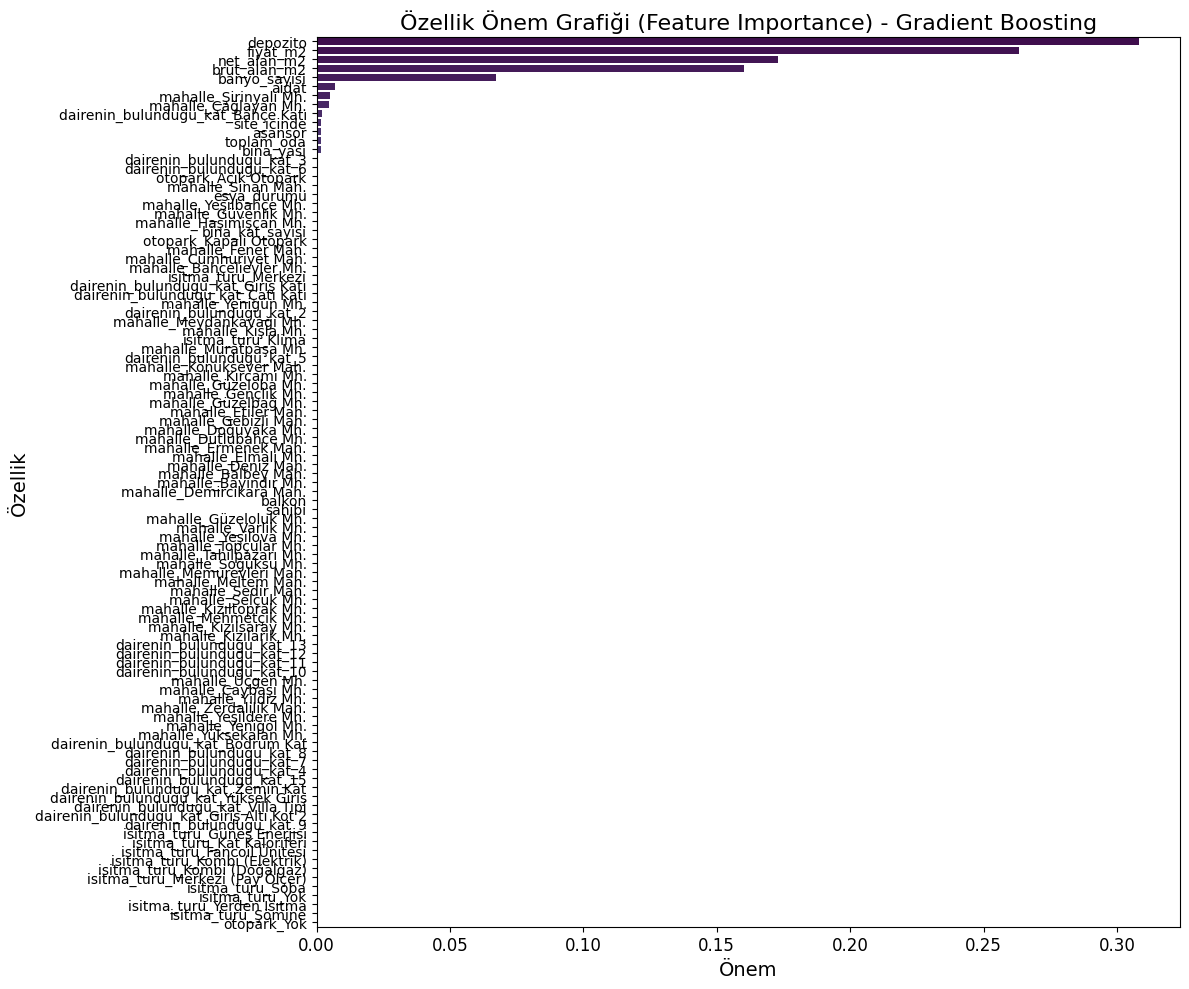

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # pandas kütüphanesini ekleyin

# Özellik önemini al
importances = models["Gradient Boosting"].feature_importances_
feature_names = X_train.columns

# Bir DataFrame olarak düzenle
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Görselleştir
plt.figure(figsize=(12, 10)) # Şekil boyutunu artırın (örn. 12x10)
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')

plt.title('Özellik Önem Grafiği (Feature Importance) - Gradient Boosting', fontsize=16) # Başlık yazı tipi boyutunu artırın
plt.xlabel('Önem', fontsize=14) # X ekseni etiketi yazı tipi boyutunu artırın
plt.ylabel('Özellik', fontsize=14) # Y ekseni etiketi yazı tipi boyutunu artırın

plt.xticks(fontsize=12) # X ekseni işaretleri yazı tipi boyutunu artırın
plt.yticks(fontsize=10) # Y ekseni işaretleri yazı tipi boyutunu artırın (çok fazla özellik varsa bu daha küçük kalabilir)

plt.tight_layout() # Düzenlemeyi otomatik ayarlar
plt.show()

<ipython-input-46-b41a2cdcab2b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')


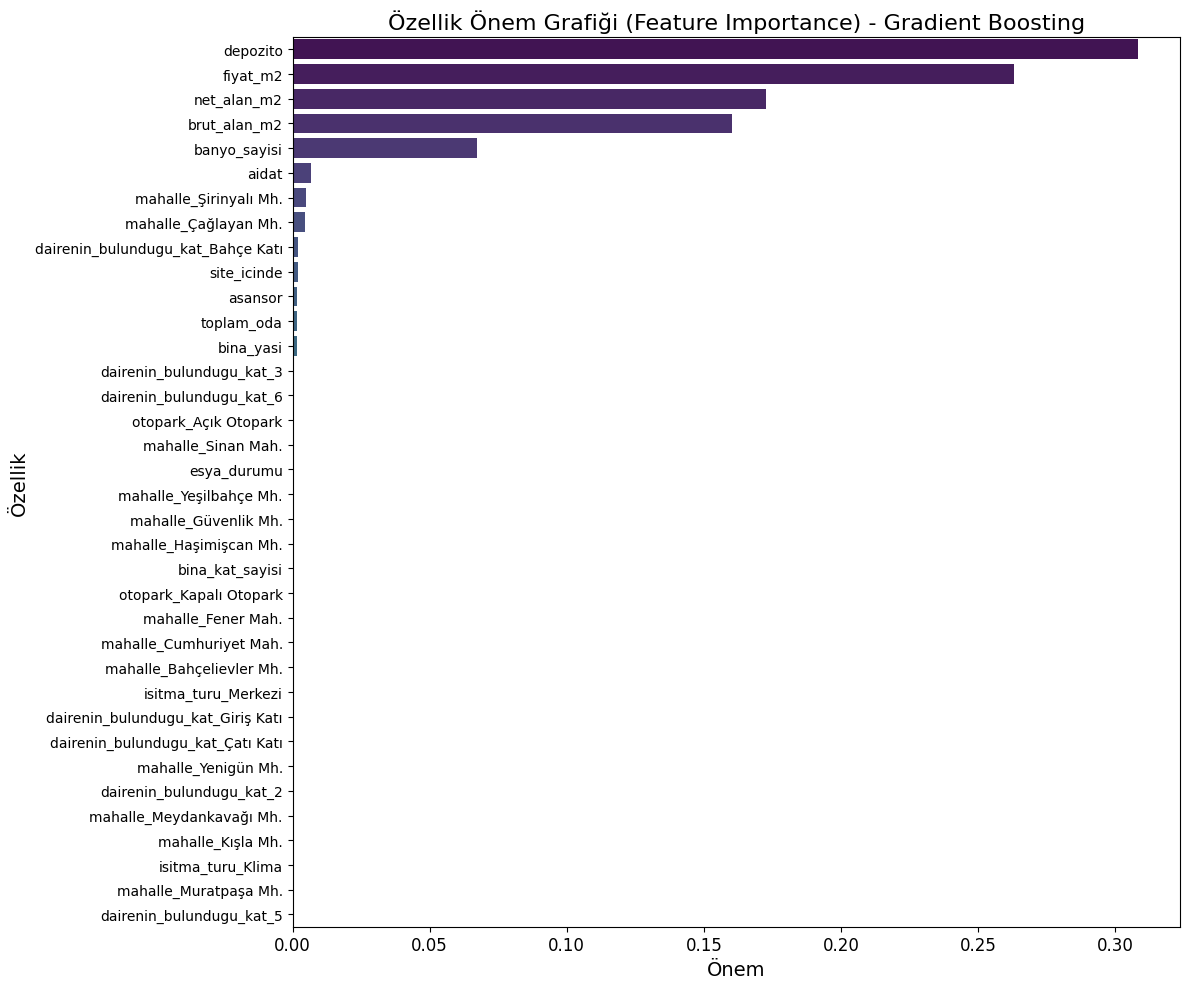

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Özellik önemini al
importances = models["Gradient Boosting"].feature_importances_
feature_names = X_train.columns

# Bir DataFrame olarak düzenle
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Önem değeri sıfır olanları filtrele
feature_importance_df = feature_importance_df[feature_importance_df['importance'] > 0]

# Görselleştir
plt.figure(figsize=(12, 10)) # Şekil boyutunu artırın (örn. 12x10)
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')

plt.title('Özellik Önem Grafiği (Feature Importance) - Gradient Boosting', fontsize=16) # Başlık yazı tipi boyutunu artırın
plt.xlabel('Önem', fontsize=14) # X ekseni etiketi yazı tipi boyutunu artırın
plt.ylabel('Özellik', fontsize=14) # Y ekseni etiketi yazı tipi boyutunu artırın

plt.xticks(fontsize=12) # X ekseni işaretleri yazı tipi boyutunu artırın
plt.yticks(fontsize=10) # Y ekseni işaretleri yazı tipi boyutunu artırın (çok fazla özellik varsa bu daha küçük kalabilir)

plt.tight_layout() # Düzenlemeyi otomatik ayarlar
plt.show()